### Importing libraries

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import src.get_data.get_data as getData

In [5]:
import src.ia_model.ia as ia

### Data loading and preprocessing (1/2)

In [6]:
gd = getData.GetData()

In [7]:
df = gd.get_data()
df.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [8]:
df = gd.rename_colums_data(df)
df

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


In [9]:
df = gd.drop_columns_data(df)
df

,Entity,Year,Air pollution
0,Afghanistan,1990,37231
1,Afghanistan,1991,38315
2,Afghanistan,1992,41172
3,Afghanistan,1993,44488
4,Afghanistan,1994,46634
...,...,...,...
6835,Zimbabwe,2015,13246
6836,Zimbabwe,2016,13131
6837,Zimbabwe,2017,12926
6838,Zimbabwe,2018,12745


In [10]:
df_brazil = gd.filter_data(df, 'Brazil')
df_brazil

,Entity,Year,Air pollution
780,Brazil,1990,86653
781,Brazil,1991,82606
782,Brazil,1992,80515
783,Brazil,1993,79970
784,Brazil,1994,77697
785,Brazil,1995,75808
786,Brazil,1996,74643
787,Brazil,1997,72801
788,Brazil,1998,72541
789,Brazil,1999,71693


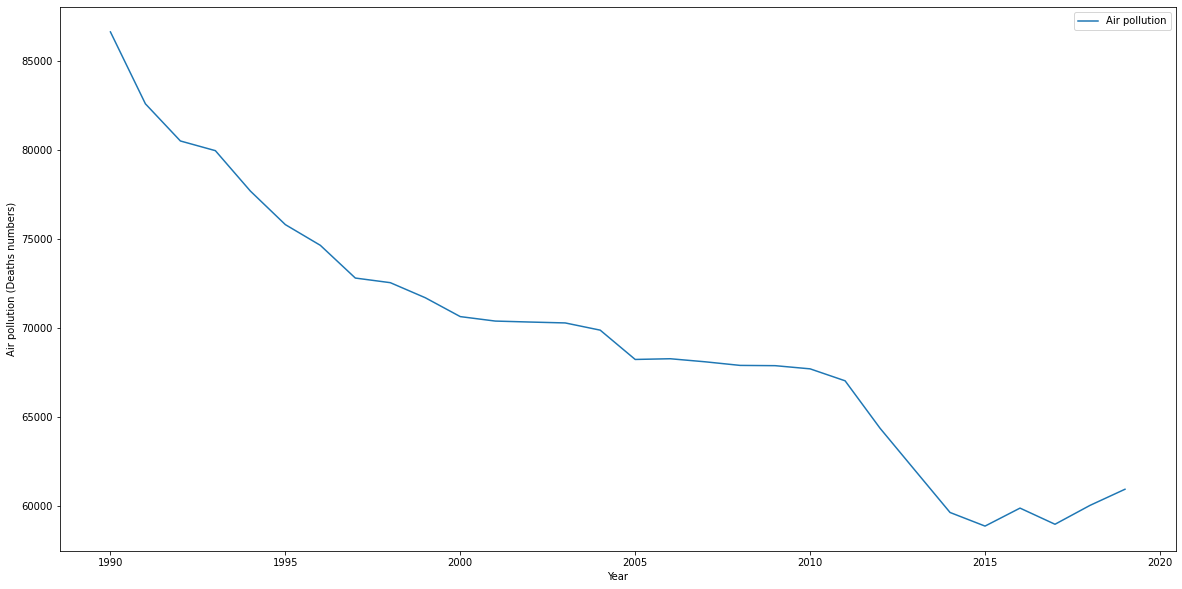

In [11]:
brazil = df_brazil.set_index(['Year'])

brazil.plot(ylabel = 'Air pollution (Deaths numbers)', figsize = (20,10))
plt.show()

### Data loading and preprocessing (2/2)

In [12]:
x_br = df_brazil[['Year']]
y_br = df_brazil[['Air pollution']]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_br, y_br, test_size=0.3, shuffle=False)

Ai model - Linear Regression

In [14]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
air_pollution_y_pred = reg.predict(x_test)

In [16]:
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred))

Coefficients: 
 [[-822.64805195]]
Mean squared error: 3664021.14
Coefficient of determination: 0.46


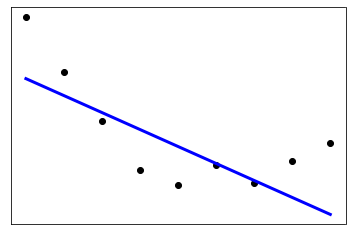

In [17]:
x_test_points = x_test.values.tolist()
y_test_points = y_test.values.tolist()

# Plot outputs
plt.scatter(x_test_points, y_test_points, color="black")
plt.plot(x_test_points, air_pollution_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
x_br_future = np.array([[2020]])
x_br_future.T

array([[2020]])

In [19]:
y_br_predict = reg.predict(x_br_future)

In [20]:
y_br_predict

array([[56614.70562771]])

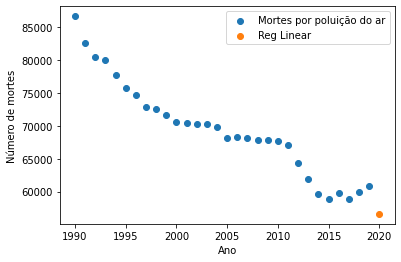

In [21]:
x_points = x_br.values.tolist()
y_points = y_br.values.tolist()

plt.scatter(x_points, y_points, label="Mortes por poluição do ar")
plt.scatter(x_br_future, y_br_predict, label= "Reg Linear")
plt.xlabel("Ano")
plt.ylabel("Número de mortes")
plt.legend()

Ai model - Ridge Regression

###### Alphas:  [0.5, 1, 2, 5, 10, 50, 100, 200]

- Alpha: 0.5

In [22]:
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [23]:
air_pollution_y_pred_2 = ridge.predict(x_test)

In [24]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2))

Coefficients: 
 [[-822.11421155]]
Mean squared error: 3654538.15
Coefficient of determination: 0.46


In [26]:
x_br_future_2 = np.array([[2020]])
x_br_future_2.T

array([[2020]])

In [27]:
y_br_predict_2 = ridge.predict(x_br_future_2)

In [28]:
y_br_predict_2

array([[56625.38243565]])

- Alpha:  1

In [30]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [31]:
air_pollution_y_pred_2_1 = ridge.predict(x_test)

In [32]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_1))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_1))

Coefficients: 
 [[-821.58106355]]
Mean squared error: 3645199.26
Coefficient of determination: 0.46


In [33]:
x_br_future_2_1 = np.array([[2020]])
x_br_future_2_1.T

array([[2020]])

In [34]:
y_br_predict_2_1 = ridge.predict(x_br_future_2_1)

In [35]:
y_br_predict_2_1

array([[56636.04539559]])

- Alpha: 2

In [42]:
ridge = linear_model.Ridge(alpha=2)
ridge.fit(x_train, y_train)

Ridge(alpha=2)

In [43]:
air_pollution_y_pred_2_2 = ridge.predict(x_test)

In [44]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_2))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_2))

Coefficients: 
 [[-820.51683938]]
Mean squared error: 3626951.58
Coefficient of determination: 0.46


In [45]:
x_br_future_2_2 = np.array([[2020]])
x_br_future_2_2.T

array([[2020]])

In [46]:
y_br_predict_2_2 = ridge.predict(x_br_future_2_2)

In [47]:
y_br_predict_2_2

array([[56657.3298791]])

- Alpha: 5

In [48]:
ridge = linear_model.Ridge(alpha=5)
ridge.fit(x_train, y_train)

Ridge(alpha=5)

In [49]:
air_pollution_y_pred_2_5 = ridge.predict(x_test)

In [50]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_5))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_5))

Coefficients: 
 [[-817.34064516]]
Mean squared error: 3575611.28
Coefficient of determination: 0.47


In [52]:
x_br_future_2_5 = np.array([[2020]])
x_br_future_2_5.T

array([[2020]])

In [53]:
y_br_predict_2_5 = ridge.predict(x_br_future_2_5)

In [55]:
y_br_predict_2_5

array([[56720.85376344]])

- Alpha: 10

In [56]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(x_train, y_train)

Ridge(alpha=10)

In [57]:
air_pollution_y_pred_2_10 = ridge.predict(x_test)

In [58]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_10))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_10))

Coefficients: 
 [[-812.10128205]]
Mean squared error: 3501136.40
Coefficient of determination: 0.48


In [59]:
x_br_future_2_10 = np.array([[2020]])
x_br_future_2_10.T

array([[2020]])

In [60]:
y_br_predict_2_10 = ridge.predict(x_br_future_2_10)

In [61]:
y_br_predict_2_10

array([[56825.64102564]])

- Alpha: 50

In [62]:
ridge = linear_model.Ridge(alpha=50)
ridge.fit(x_train, y_train)

Ridge(alpha=50)

In [63]:
air_pollution_y_pred_2_50 = ridge.predict(x_test)

In [64]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_50))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_50))

Coefficients: 
 [[-772.48658537]]
Mean squared error: 3349677.51
Coefficient of determination: 0.50


In [65]:
x_br_future_2_50 = np.array([[2020]])
x_br_future_2_50.T

array([[2020]])

In [66]:
y_br_predict_2_50 = ridge.predict(x_br_future_2_50)

In [67]:
y_br_predict_2_50

array([[57617.93495935]])

- Alpha: 100

In [68]:
ridge = linear_model.Ridge(alpha=100)
ridge.fit(x_train, y_train)

Ridge(alpha=100)

In [69]:
air_pollution_y_pred_2_100 = ridge.predict(x_test)

In [70]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_100))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_100))

Coefficients: 
 [[-728.0908046]]
Mean squared error: 4043988.76
Coefficient of determination: 0.40


- Alpha: 200

In [71]:
ridge = linear_model.Ridge(alpha=200)
ridge.fit(x_train, y_train)

Ridge(alpha=200)

In [72]:
air_pollution_y_pred_2_200 = ridge.predict(x_test)

In [73]:
print('Coefficients: \n', ridge.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_2_200))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_2_200))

Coefficients: 
 [[-653.02989691]]
Mean squared error: 7295121.35
Coefficient of determination: -0.08


Ai model - Lasso Regression

###### Alpha:  [0.5]

- Alpha: 0.5

In [74]:
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(x_train, y_train)

Lasso(alpha=0.5)

In [75]:
air_pollution_y_pred_3 = lasso.predict(x_test)

In [76]:
print('Coefficients: \n', lasso.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_3))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_3))

Coefficients: 
 [-822.63441558]
Mean squared error: 3663777.26
Coefficient of determination: 0.46


Ai model - MultiTaskLasso Regression

###### Alpha:  [0.5, 50, 100]

- Alpha: 0.5

In [77]:
multi = linear_model.MultiTaskLasso(alpha=0.5)
multi.fit(x_train, y_train)

MultiTaskLasso(alpha=0.5)

In [78]:
air_pollution_y_pred_4 = multi.predict(x_test)

In [79]:
print('Coefficients: \n', multi.coef_)
print('Intercept: \n', multi.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_4))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_4))

Coefficients: 
 [[-822.63441558]]
Intercept: 
 [1718336.4978355]
Mean squared error: 3663777.26
Coefficient of determination: 0.46


- Alpha: 50

In [80]:
multi = linear_model.MultiTaskLasso(alpha=50)
multi.fit(x_train, y_train)

MultiTaskLasso(alpha=50)

In [81]:
air_pollution_y_pred_3_50 = multi.predict(x_test)

In [82]:
print('Coefficients: \n', multi.coef_)
print('Intercept: \n', multi.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_3_50))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_3_50))

Coefficients: 
 [[-821.28441558]]
Intercept: 
 [1715636.4978355]
Mean squared error: 3640060.05
Coefficient of determination: 0.46


- Alpha: 100

In [83]:
multi = linear_model.MultiTaskLasso(alpha=100)
multi.fit(x_train, y_train)

MultiTaskLasso(alpha=100)

In [84]:
air_pollution_y_pred_3_100 = multi.predict(x_test)

In [85]:
print('Coefficients: \n', multi.coef_)
print('Intercept: \n', multi.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_3_100))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_3_100))

Coefficients: 
 [[-819.92077922]]
Intercept: 
 [1712909.22510823]
Mean squared error: 3616960.53
Coefficient of determination: 0.46


Ai model - BayesianRidge Regression

! [normalize=True]

In [86]:
bays = linear_model.BayesianRidge(n_iter=1000, 
                                  tol=0.001, 
                                  alpha_1=1e-06, 
                                  alpha_2=1e-06, 
                                  lambda_1=1e-06, 
                                  lambda_2=1e-06, 
                                  compute_score=False, 
                                  fit_intercept=True, 
                                  normalize=True, 
                                  copy_X=True, 
                                  verbose=False)
bays.fit(x_train, y_train)

BayesianRidge(n_iter=1000, normalize=True)

In [87]:
air_pollution_y_pred_5 = bays.predict(x_test)

In [88]:
print('Coefficients: \n', bays.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_5))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_5))

Coefficients: 
 [-4.2522744e-05]
Mean squared error: 145729365.70
Coefficient of determination: -20.58


! [normalize=False]

In [89]:
bays = linear_model.BayesianRidge(n_iter=1000, 
                                  tol=0.001, 
                                  alpha_1=1e-06, 
                                  alpha_2=1e-06, 
                                  lambda_1=1e-06, 
                                  lambda_2=1e-06, 
                                  compute_score=False, 
                                  fit_intercept=True, 
                                  normalize=False, 
                                  copy_X=True, 
                                  verbose=False)
bays.fit(x_train, y_train)

BayesianRidge(n_iter=1000, normalize=False)

In [90]:
air_pollution_y_pred_5_2 = bays.predict(x_test)

In [91]:
print('Coefficients: \n', bays.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, air_pollution_y_pred_5_2))
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_5_2))

Coefficients: 
 [-816.00831293]
Mean squared error: 3555466.92
Coefficient of determination: 0.47


Ai model - Huber Regression

In [102]:
hreg = linear_model.HuberRegressor(epsilon=1.35)
hreg.fit(x_train, y_train)

HuberRegressor()

In [120]:
air_pollution_y_pred_6 = hreg.predict(x_test)

In [121]:
print('Coefficient of determination: %.2f' % r2_score(y_test, air_pollution_y_pred_6))

Coefficient of determination: 0.51


In [122]:
x_br_future_3 = np.array([[2020]])
x_br_future_3.T

array([[2020]])

In [123]:
y_br_predict_3 = hreg.predict(x_br_future_3)

In [124]:
y_br_predict_3

array([57513.40617324])

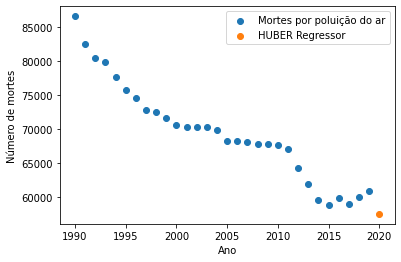

In [125]:
plt.scatter(x_points, y_points, label="Mortes por poluição do ar")
plt.scatter(x_br_future_3, y_br_predict_3, label= "HUBER Regressor")
plt.xlabel("Ano")
plt.ylabel("Número de mortes")
plt.legend()